In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn.datasets import make_circles

# Minimal average distance in an n-dimensional cube with N=1000 sample points

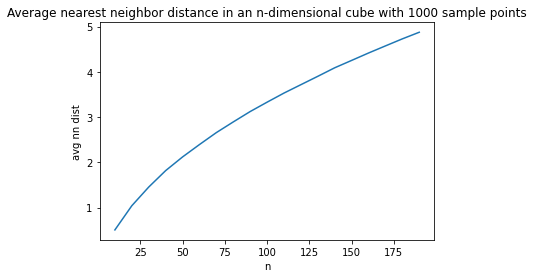

In [70]:
N = 1000 # number of sample points
n_range = range(10, 200, 10) # cube dimension
avg_nn_dist = []
for n in n_range:
    sample_points_cube = np.random.uniform(0.,1., (N, n))
    distance_cube = distance_matrix(sample_points_cube, sample_points_cube)
    avg_nn_dist.append(np.amin(distance_cube + np.diag([np.inf] * N), axis=0).mean())
plt.plot(n_range, avg_nn_dist)

plt.title(f'Average nearest neighbor distance in an n-dimensional cube with {N} sample points')
plt.xlabel('n')
plt.ylabel('avg nn dist')
plt.show()

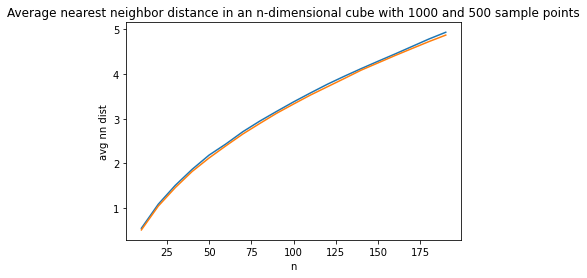

In [72]:
N = 500 # number of sample points
n_range_half = range(10, 200, 10) # cube dimension
avg_nn_dist_half = []
for n in n_range_half:
    sample_points_cube = np.random.uniform(0.,1., (N, n))
    distance_cube = distance_matrix(sample_points_cube, sample_points_cube)
    avg_nn_dist_half.append(np.amin(distance_cube + np.diag([np.inf] * N), axis=0).mean())
plt.plot(n_range_half, avg_nn_dist_half)
plt.plot(n_range, avg_nn_dist)
plt.title(f'Average nearest neighbor distance in an n-dimensional cube with {2*N} and {N} sample points')
plt.xlabel('n')
plt.ylabel('avg nn dist')
plt.show()

They both have the complexity $O(\sqrt{n})$ and are exponential in $N$.

# Average distance to random hyperplane in n-dimesional cube

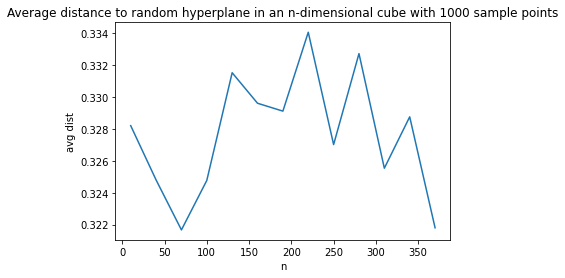

In [67]:
N = 1000 # number of sample points
n_hyper = 1000
n_range = range(10, 400, 30) # cube dimension
avg_dist_to_hyp = []

for n in n_range:
    # Create random hyperplane
    base_point = np.random.uniform(0.,1., (n_hyper, n))
    unnormalized_direction = np.random.multivariate_normal(np.zeros(n), np.eye(n), n_hyper)
    normal_vector = (unnormalized_direction/np.linalg.norm(unnormalized_direction, axis=1)[:, np.newaxis])
    base_val = np.einsum('ij,ij->i', base_point, normal_vector)

    # Create N random vectors in n-dimensional hypercube
    sample_points_cube = np.random.uniform(0.,1., (N, n))

    dist_to_hyp = np.abs(np.einsum('ij,kj->ik', normal_vector, sample_points_cube) - base_val[:, np.newaxis])
    avg_dist_to_hyp.append(dist_to_hyp.mean())

# Plot average distance to random hyperplane
plt.plot(n_range, avg_dist_to_hyp)

plt.title(f'Average distance to random hyperplane in an n-dimensional cube with {N} sample points')
plt.xlabel('n')
plt.ylabel('avg dist')
plt.show()

The avg distance to a random point in an $n$-dimensional hypercube has the complexity $O(1)$.

# Average nearest neighbor distance on an n-sphere

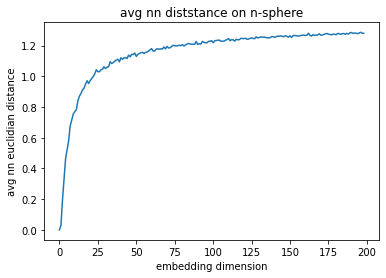

In [73]:
for n_samples in range(100, 200, 100): # number of sample_points
    avg_dist = []
    for m in range(1,200):
        normal_points = np.random.multivariate_normal(np.zeros(m), np.eye(m), n_samples)
        sphere_sample_points = normal_points/np.linalg.norm(normal_points, axis=-1)[:, np.newaxis]
        dist_sphere = distance_matrix(sphere_sample_points, sphere_sample_points)
        avg_dist.append(np.amin(dist_sphere + np.diag([np.inf] * n_samples), axis=0).mean())
    plt.plot(avg_dist)
plt.title('avg nn diststance on n-sphere')
plt.xlabel('embedding dimension')
plt.ylabel('avg nn euclidian distance')
plt.show()

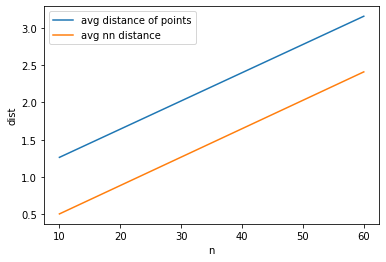

In [10]:
N = 1000 # number of sample points
n_range = range(10,100,50) # cube dimension
avg_dist = []
for n in n_range:
    sample_points_cube = np.random.uniform(0.,1., (N, n))
    distance_cube = distance_matrix(sample_points_cube, sample_points_cube)
    avg_dist.append(distance_cube.mean())
plt.plot(n_range, avg_dist, label = 'avg distance of points')

avg_nn_dist = []
N=1000
for n in n_range:
    sample_points_cube = np.random.uniform(0.,1., (N, n))
    distance_cube = distance_matrix(sample_points_cube, sample_points_cube)
    avg_nn_dist.append(np.amin(distance_cube + np.diag([np.inf] * N), axis=0).mean())
plt.plot(n_range, avg_nn_dist, label='avg nn distance')

plt.xlabel('n')
plt.ylabel('dist')
plt.legend()
plt.show()

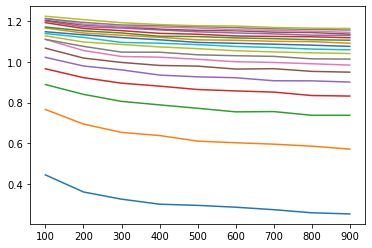

In [384]:
n_samples_range = range(100, 1000, 100)
for m in range(5, 100, 5):
    avg_dist=[]
    for n_samples in n_samples_range: # number of sample_points
            normal_points = np.random.multivariate_normal(np.zeros(m), np.eye(m), n_samples)
            sphere_sample_points = normal_points/np.linalg.norm(normal_points, axis=-1)[:, np.newaxis]
            dist_sphere = distance_matrix(sphere_sample_points, sphere_sample_points)
            avg_dist.append(np.amin(dist_sphere + np.diag([np.inf] * n_samples), axis=0).mean())
    plt.plot(n_samples_range,avg_dist)
plt.show()

# Possible Solutions

![possible_solutions](images/possible_solutions_to_complexity_problem.png)

# Open Problems

![possible_solutions](images/open_problems.png)